# Data Preparation

Dataset: <a href="https://data.world/datafiniti/electronic-products-and-pricing-data">Electronic Product and Pricing Data by Datafiniti</a><br>
Filename: DatafinitiElectronicsProductsPricingData.csv


## Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [27]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
from scipy.stats import norm
from scipy import stats

________

# Part 1 - All Features

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [206]:
df = pd.read_csv("./DatafinitiElectronicsProductsPricingData.csv")

View the Dataset

In [207]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Check the Shape

In [208]:
df.shape

(891, 12)

Set the correct index

In [209]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


## Ensure Columns / Features have Proper Labels

In [210]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
# RENAME COLUMNS
proper_label = {'Pclass':'Passenger_class', 'SibSp':'Siblings_Spouse_Aboard', 'Parch':'Parents_Children_Aboard'}

df.rename(columns=proper_label)

,PassengerId,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse_Aboard,Parents_Children_Aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


## Ensure Correct Format of Values

In [212]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [213]:
df.index.duplicated().sum()

0

Check if there are duplicated rows


In [214]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Remove the duplicates if any

In [215]:
df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [216]:
#Gets the total number of missing data
total = df.isnull().sum().sort_values(ascending=False)


In [217]:
#Get % of Null
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [218]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
Cabin,687,0.77
Age,177,0.20
Embarked,2,0.00
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


Handle the columns with missing values
* For numerical values, fill in with either the mean or the median
* For categorical values, fill with a value to represent Unknown values. 

In [219]:
df.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
D37            1
A24            1
D49            1
D19            1
B39            1
Name: Cabin, Length: 147, dtype: int64

In [220]:
df_cab = df.fillna({'Cabin' : 'Unknown'})

In [221]:
df_cab.groupby('Cabin')['Fare'].mean()

Cabin
A10       40.12
A14       52.00
A16       39.60
A19       26.00
A20       56.93
           ... 
F38        7.75
F4        39.00
G6        13.58
T         35.50
Unknown   19.16
Name: Fare, Length: 148, dtype: float64

In [222]:
df.fillna({'Cabin' : 'Unknown'}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [223]:
df.Age.describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

In [224]:
df_age = df.Age.median()
df_age

28.0

In [225]:
df.Age.fillna(df_age, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.00,1,2,W./C. 6607,23.45,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

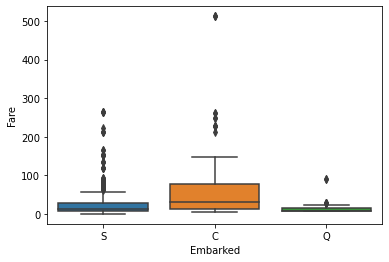

In [226]:
sns.boxplot('Embarked','Fare', data=df)

In [227]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,889
unique,891,2,681,148,3
top,"Beane, Mr. Edward",male,CA. 2343,Unknown,S
freq,1,577,7,687,644


In [228]:
#replace the missing values to the most frequent one
df_embark = df.copy()
df_embark['Embarked'] = df['Embarked'].fillna('S', inplace=True)


In [229]:
df.shape

(891, 12)

## Split into Numerical, Categorical, and Target

In [230]:
#categorical
df_cat = df.select_dtypes(include=['object'])

#numerical
df_num = df.select_dtypes(include=['int64', 'float64'])

#target
df_target = df['Fare']

## Check the Distribution of the Target Variable

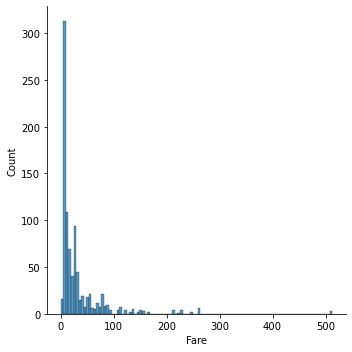

In [231]:
sns.displot(df_num['Fare'])

<AxesSubplot:xlabel='Fare'>

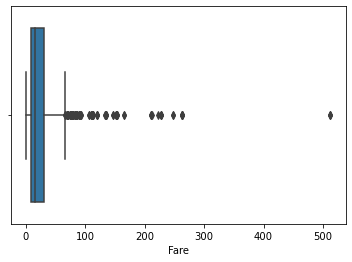

In [232]:
sns.boxplot(df_num['Fare'])

In [233]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00,1,0,7.25
1,2,1,1,38.00,1,0,71.28
2,3,1,3,26.00,0,0,7.92
3,4,1,1,35.00,1,0,53.10
4,5,0,3,35.00,0,0,8.05
...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,13.00
887,888,1,1,19.00,0,0,30.00
888,889,0,3,28.00,1,2,23.45
889,890,1,1,26.00,0,0,30.00


In [234]:
df_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


_______

# Part 2 - Numerical Features

Get the statistics for numerical data

In [235]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00,1,0,7.25
1,2,1,1,38.00,1,0,71.28
2,3,1,3,26.00,0,0,7.92
3,4,1,1,35.00,1,0,53.10
4,5,0,3,35.00,0,0,8.05
...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,13.00
887,888,1,1,19.00,0,0,30.00
888,889,0,3,28.00,1,2,23.45
889,890,1,1,26.00,0,0,30.00


Analyze the following features:
1. Pclass
    1. Get Value Counts
2. Age
    1. Plot the distribution
    2. Create a Boxplot
3. Fare
    1. Plot the distribution
    2. Create a Boxplot

*For now, do not remove any outliers*

In [236]:
#1 Pclass
df_num['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

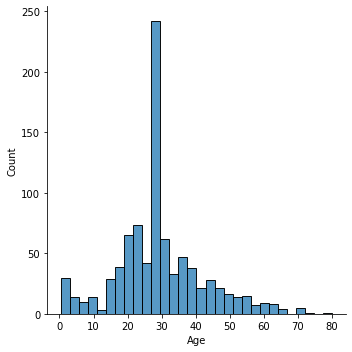

In [237]:
#2 Age
sns.displot(df_num['Age'])

<AxesSubplot:xlabel='Age'>

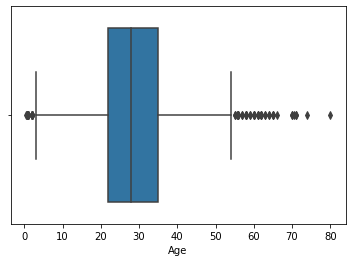

In [238]:
sns.boxplot(df_num['Age'])

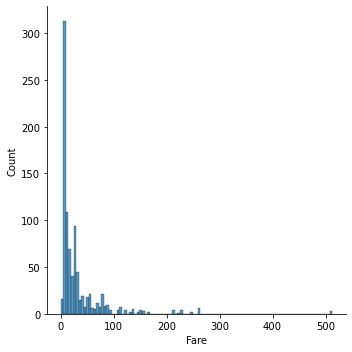

In [239]:
#3 Fare
sns.displot(df_num['Fare'])

<AxesSubplot:xlabel='Fare'>

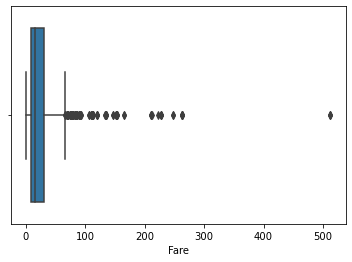

In [240]:
sns.boxplot(df_num['Fare'])

## Feature Scaling 

Check Scale of Features

In [241]:
df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.36,0.52,0.38,32.20
std,257.35,0.49,0.84,13.02,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [242]:
from sklearn.preprocessing import MinMaxScaler

Use the MinMax Scaler to scale the numerical features

In [243]:
scaler = MinMaxScaler()

In [244]:
scaled_values = scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(scaled_values, columns=df_num.columns, index=df_num.index)

In [245]:
df_num_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.00,0.00,1.00,0.27,0.12,0.00,0.01
1,0.00,1.00,0.00,0.47,0.12,0.00,0.14
2,0.00,1.00,1.00,0.32,0.00,0.00,0.02
3,0.00,1.00,0.00,0.43,0.12,0.00,0.10
4,0.00,0.00,1.00,0.43,0.00,0.00,0.02


______

# Part 3 - Categorical Features

Get the statistics for the categorical features

In [246]:
df_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


Remove any categorical features which does not add value to the model.<br>
In this case this would be the following features:
* Name = name of the passenger
* Ticket = ticket number
* Cabin = cabin number

In [247]:
df_cat.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [248]:
df_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


Print categorical values for each feature

In [249]:
df_cat['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [250]:
df_cat['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Convert Categories to Number 

In [251]:
df_cat = df.select_dtypes(include=['object'])

In [252]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S


In [253]:
#getting ordinal categories
cat_ord = ['Embarked', 'Sex']

In [254]:
df_cat_ord = df_cat[cat_ord]

In [255]:
df_cat_ord.head()

,Embarked,Sex
0,S,male
1,C,female
2,S,female
3,S,female
4,S,male


In [256]:
#seperate the non-ordinal categories
df_cat.drop(df_cat_ord, inplace=True, axis=1)

In [257]:
df_cat.columns

Index(['Name', 'Ticket', 'Cabin'], dtype='object')

In [258]:
print(df_cat_ord.columns)
for cat_col in list(df_cat_ord.columns):
    print(df_cat_ord[cat_col].value_counts())
    print('\n----------------')

Index(['Embarked', 'Sex'], dtype='object')
S    646
C    168
Q     77
Name: Embarked, dtype: int64

----------------
male      577
female    314
Name: Sex, dtype: int64

----------------


In [259]:
#convert original categories to number, add to the original dataframe
df_cat_ord['Embarked_num'] = 1
df_cat_ord.loc[(df_cat_ord['Embarked'] == 'S'), 'Embarked_num'] = 2
df_cat_ord.loc[(df_cat_ord['Embarked'] == 'C'), 'Embarked_num'] = 3
df_cat_ord.loc[(df_cat_ord['Embarked'] == 'Q'), 'Embarked_num'] = 4

df_cat_ord['Sex_num'] = 1
df_cat_ord.loc[(df_cat_ord['Sex'] == 'male'), 'Sex_num'] = 2
df_cat_ord.loc[(df_cat_ord['Sex'] == 'female'), 'Sex_num'] = 3

In [260]:
df_cat_ord

,Embarked,Sex,Embarked_num,Sex_num
0,S,male,2,2
1,C,female,3,3
2,S,female,2,3
3,S,female,2,3
4,S,male,2,2
...,...,...,...,...
886,S,male,2,2
887,S,female,2,3
888,S,female,2,3
889,C,male,3,2


In [261]:
#removing the original features
df_cat_ord.drop(cat_ord, axis=1, inplace=True)
df_cat_ord.head()

,Embarked_num,Sex_num
0,2,2
1,3,3
2,2,3
3,2,3
4,2,2


_______

# Combine all the prepared dataframes

In [262]:
df_list = [df_num_scaled, df_cat_ord, df_target]

df_final = pd.concat(df_list, axis = 1)

In [263]:
df_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num,Fare
0,0.00,0.00,1.00,0.27,0.12,0.00,0.01,2,2,7.25
1,0.00,1.00,0.00,0.47,0.12,0.00,0.14,3,3,71.28
2,0.00,1.00,1.00,0.32,0.00,0.00,0.02,2,3,7.92
3,0.00,1.00,0.00,0.43,0.12,0.00,0.10,2,3,53.10
4,0.00,0.00,1.00,0.43,0.00,0.00,0.02,2,2,8.05


In [264]:
df_final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_num', 'Sex_num', 'Fare'],
      dtype='object')

In [265]:
df_final.shape

(891, 10)

## Save final DataFrame as a csv file

In [266]:
df_final.to_csv('./Output/c2_titanic_Output1.csv')

### Check if it loads correctly

In [267]:
df_check = pd.read_csv('./Output/c2_titanic_Output1.csv', index_col='PassengerId')

In [268]:
df_check.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num,Fare.1
PassengerId,,,,,,,,,,
0.00,0,0.00,1.00,0.27,0.12,0.00,0.01,2,2,7.25
0.00,1,1.00,0.00,0.47,0.12,0.00,0.14,3,3,71.28
0.00,2,1.00,1.00,0.32,0.00,0.00,0.02,2,3,7.92
0.00,3,1.00,0.00,0.43,0.12,0.00,0.10,2,3,53.10
0.00,4,0.00,1.00,0.43,0.00,0.00,0.02,2,2,8.05
